In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
np.random.seed(7)


In [76]:
# Generate data for X|t=1
mean1 = [-2,-2]
dev1 = [[2,1],[1,2]]
X1 = np.random.multivariate_normal(mean1, dev1, 200)
t1 = np.ones((200,1))


In [77]:
# Generate data for X|t=-1
mean2 = [1,1]
dev2 = [[3,-2],[-2,3]]
X2 = np.random.multivariate_normal(mean2, dev2, 200)
t2 = -t1


In [90]:
# Combine the data
X = np.row_stack((X1, X2))
t = np.row_stack((t1, t2))
X, t

## Logistic Regression

In [79]:
logreg = LogisticRegression(penalty='l2',C=10).fit(X, t.ravel())

In [80]:
predlog=logreg.predict(X)
print("Logistic Regression Score is:",logreg.score(X,t.ravel()))

Logistic Regression Score is: 0.925


## Fisher's Linear Discrimant

In [81]:
lindisc= LinearDiscriminantAnalysis().fit(X,t.ravel())

In [82]:
predlin=lindisc.predict(X)
print("Fisher's Linear Discrimant Score is:",lindisc.score(X,t.ravel()))

Fisher's Linear Discrimant Score is: 0.9225


## Quadratic Discrimant Analysis

In [83]:
quadisc=QuadraticDiscriminantAnalysis().fit(X,t.ravel())

In [84]:
predquad=quadisc.predict(X)
print("Quadratic Discrimant Analysis is:",quadisc.score(X,t.ravel()))

Quadratic Discrimant Analysis is: 0.94


## Support Vector Machine Classifier

In [85]:
svc=SVC().fit(X,t.ravel())

In [86]:
predsvc=svc.predict(X)
print("Support Vector Classifier Score is:",svc.score(X,t.ravel()))

Support Vector Classifier Score is: 0.9425


## Reporting Classification Accuracy

In [87]:
a=['Logistic Regression', 'Fishers Linear Discrimant','Quadratic Discrimant','Support Vector Classifier']
b=[logreg.score(X,t.ravel()),lindisc.score(X,t.ravel()),quadisc.score(X,t.ravel()),svc.score(X,t.ravel())]
scores=pd.DataFrame({'Classifier':a,'Score':b})
scores

,Classifier,Score
0,Logistic Regression,0.9250
1,Fishers Linear Discrimant,0.9225
2,Quadratic Discrimant,0.9400
3,Support Vector Classifier,0.9425


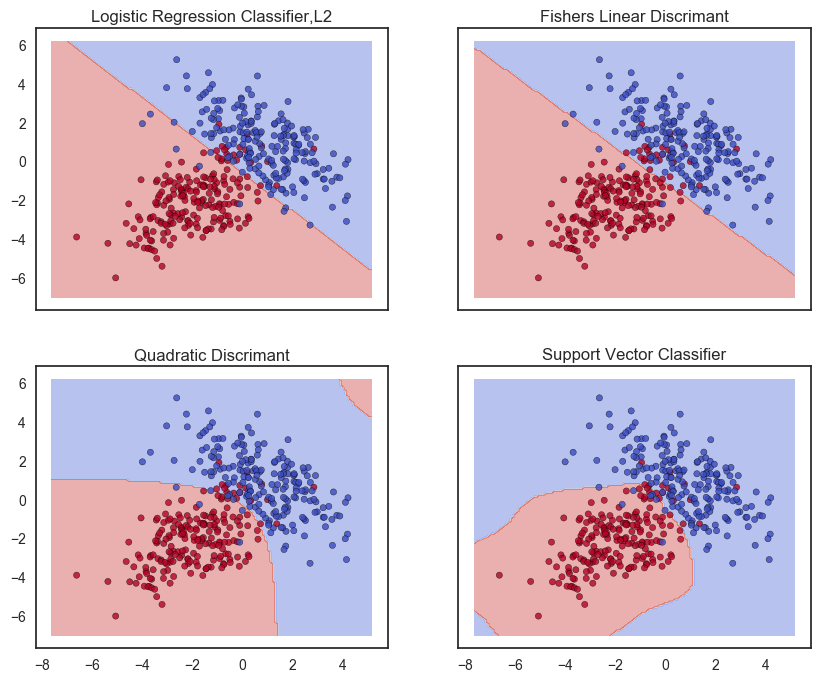

In [88]:
# Plotting decision regions
from itertools import product


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(10,8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [logreg, lindisc, quadisc, svc],
                        ['Logistic Regression Classifier,L2', 'Fishers Linear Discrimant',
                         'Quadratic Discrimant', 'Support Vector Classifier']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=t, alpha=0.8,cmap=plt.cm.coolwarm)
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()